In [19]:
import pandas as pd
import numpy as np
import math

In [200]:
ideal_temperature = lambda t : np.maximum(0.005, ((-t**4 + t * 55000) / 55000) - 16)
ideal_irradiation_sum = lambda i : (1 - 1 / i * 1000)
ideal_fruit_set = lambda f : (8 + f / 8) / 100
production = lambda irradiation_sum, average_day_temperature, fruit_set  : ideal_irradiation_sum(irradiation_sum)  * ideal_temperature(average_day_temperature) * ideal_fruit_set(fruit_set) + 0.5

In [201]:
irradiation = lambda d : ((np.sin((2*math.pi/52)*(d - 11.6465)) + 1) * 2500) + 2000
temperature = lambda d : ((np.sin((2*math.pi/52)*(d - 11.6465)) + 1) * 5) + 18
fruit_set = lambda d : (5 + d / 3.5) * (80-d)

In [267]:
grow_seasons = 4
week = np.arange(51)
weeks = np.tile(week, grow_seasons)
irradiation_total = [] 
temperature_total = [] 
fruit_set_total = []

for season in range(grow_seasons):
    irradiation_total.append(irradiation(week) + np.random.normal(0, 50, 51))
    temperature_total.append(temperature(week) + np.random.normal(0, 0.3, 51))
    fruit_set_total.append(fruit_set(week) + np.random.normal(0, 10, 51))

irradiation_total = np.concatenate(irradiation_total)
temperature_total = np.concatenate(temperature_total)
fruit_set_total = np.concatenate(fruit_set_total)

In [268]:
realised_prod = production(irradiation_total, temperature_total, fruit_set_total)

In [273]:
data = pd.DataFrame(data = {
    'week_number' : weeks,
    'irradiation' : irradiation_total,
    'temperature' : temperature_total,
    'fruit_set' : fruit_set_total,
    'production' : realised_prod
})
data.to_csv("input.csv", index=False)

<AxesSubplot:>

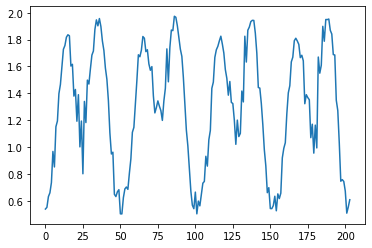

In [270]:
data["production"].plot()

In [271]:
data.corr()

,week_number,irradiation,temperature,fruit_set,production
week_number,1.000000,-0.034095,-0.032657,0.690734,0.042151
irradiation,-0.034095,1.000000,0.995666,0.658338,0.629356
temperature,-0.032657,0.995666,1.000000,0.655838,0.622734
fruit_set,0.690734,0.658338,0.655838,1.000000,0.579615
production,0.042151,0.629356,0.622734,0.579615,1.000000
